# MMDetection 教程

## 1、安装配置MMDetection

In [1]:
#新建conda环境
!conda env list        

# conda environments:
#
                         /home/snnu/anaconda3
                         /home/snnu/anaconda3/envs/jxl
                         /home/snnu/anaconda3/envs/torch18
                         /home/snnu/anaconda3/envs/zt
base                     /home/snnu/miniconda3
mmcls                    /home/snnu/miniconda3/envs/mmcls
mmdet                    /home/snnu/miniconda3/envs/mmdet
mmdet17               *  /home/snnu/miniconda3/envs/mmdet17
mmpose                   /home/snnu/miniconda3/envs/mmpose
paddleVedio              /home/snnu/miniconda3/envs/paddleVedio
tensorflow               /home/snnu/miniconda3/envs/tensorflow
torch18                  /home/snnu/miniconda3/envs/torch18



In [2]:
!pip list

Package             Version
------------------- ---------
argon2-cffi         21.1.0
attrs               21.2.0
backcall            0.2.0
bleach              4.1.0
certifi             2021.10.8
cffi                1.15.0
debugpy             1.5.1
decorator           5.1.0
defusedxml          0.7.1
entrypoints         0.3
importlib-resources 5.4.0
ipykernel           6.5.0
ipython             7.29.0
ipython-genutils    0.2.0
ipywidgets          7.6.5
jedi                0.18.0
Jinja2              3.0.3
jsonschema          4.2.1
jupyter             1.0.0
jupyter-client      7.0.6
jupyter-console     6.4.0
jupyter-core        4.9.1
jupyterlab-pygments 0.1.2
jupyterlab-widgets  1.0.2
MarkupSafe          2.0.1
matplotlib-inline   0.1.3
mistune             0.8.4
nbclient            0.5.8
nbconvert           6.3.0
nbformat            5.1.3
nest-asyncio        1.5.1
notebook            6.4.5
packaging           21.2
pandocfilters       1.5.0
parso               0.8.2
pexpect             4.8.0


In [3]:
#安装pytorch
!pip install torchvision==0.9.1 

  Using cached torchvision-0.9.1-cp38-cp38-manylinux1_x86_64.whl (17.4 MB)
  Using cached Pillow-8.4.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached numpy-1.21.4-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached torch-1.8.1-cp38-cp38-manylinux1_x86_64.whl (804.1 MB)


In [6]:
import torch
print(torch.__version__)
torch.cuda.is_available()


1.8.1+cu102


True

In [9]:
#安装mmcv-full 注意对应版本
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.8.0/index.html      #加sudo权限

In [11]:
# 下载mmdetection17版本
# !git clone https://github.com/open-mmlab/mmclassification.git


In [12]:
%cd mmdetection/

/home/snnu/chenkequan/notebooke/mmdet/mmdetection


In [16]:
# 安装依赖
# !pip install -e .

In [15]:
#检查环境
#检查torch 和gpu
import torch ,torchvision
print(torch.__version__,torch.cuda.is_available())

#检查mmdetection
import mmdet
print(mmdet.__version__)

#检查mmcv
from mmcv.ops import get_compiling_cuda_version,get_compiler_version
print(get_compiler_version())
print(get_compiling_cuda_version())

1.8.1+cu102 True
2.18.0
GCC 7.3
10.2


## 2、使用faster RCNN模型实现单张推理

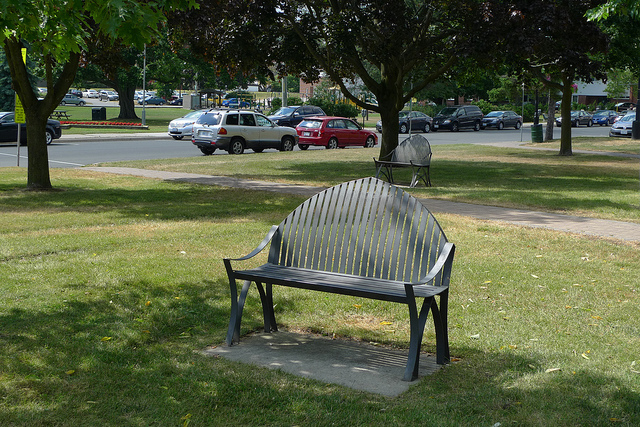

In [17]:
from PIL import Image
Image.open('demo/demo.jpg')

In [18]:
# 下载训练好的faster-RCNN模型到checkpoints文件夹
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-11-15 11:20:56--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
正在解析主机 download.openmmlab.com (download.openmmlab.com)... 47.108.5.70
正在连接 download.openmmlab.com (download.openmmlab.com)|47.108.5.70|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 167287506 (160M) [application/octet-stream]
正在保存至: “checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth”

checkpoints/faster_ 100%[===================>] 159.54M  10.9MB/s    in 15s     

2021-11-15 11:21:12 (10.3 MB/s) - 已保存 “checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth” [167287506/167287506])



In [26]:
from mmdet.apis import inference_detector ,init_detector ,show_result_pyplot

#设置device
device1  = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#选择模型对应的配置文件
condfig = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
#选择下载好的checkpoint
checkpoint = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
#初始化模型
model = init_detector(condfig,checkpoint,device=device1)

load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [27]:
#使用模型进行单张推理
img = 'demo/demo.jpg'
result = inference_detector(model,img)

/home/snnu/chenkequan/notebooke/mmdet/mmdetection/mmdet/datasets/utils.py:65: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


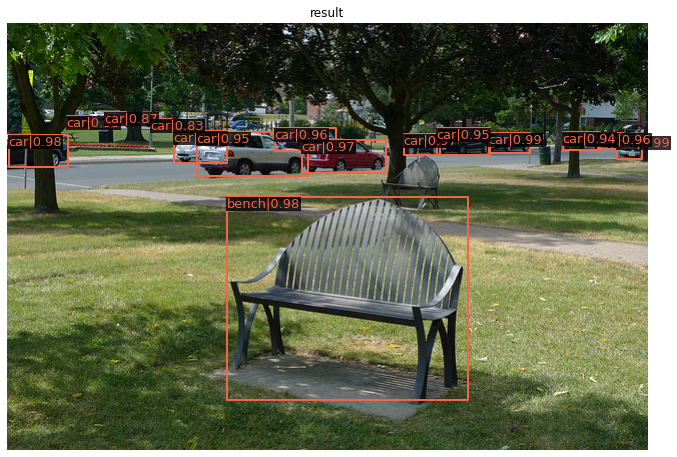

In [28]:
#在原图上绘制结果
show_result_pyplot(model,img,result,score_thr=0.8)

In [29]:
result

[array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454655e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88788104e-02],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20716342e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[6.09650024e+02, 1.13805901e+02, 6.34511658e+02, 1.36951904e+02,
         9.88766015e-01],
        [4.81773712e+02, 1.10480995e+02, 5.22459717e+02, 1.30407104e+02,
         9.87157285e-01],
        [1.01821303e+00, 1.12144722e+02, 6.04374390e+01, 1.44173752e+02,
         9.83206093e-01],
        [2.94623749e+02, 1.17035233e+02, 3.78022675e+02, 1.50550873e+02,
         9.71326888e-01],
        [3.96328979e+02, 1.11203323e+02, 4.32490540e+02, 1.32729263e+02,
         9.67802048e-01],
        [5.90976318e+02, 1.10802658e+02, 6.15401917e+02, 1.26493553e+02,
         9.59414959e-01],
        [2.67582001e+02, 1.05686005e+02, 3.28818756

### 2.1、结果解析
    列表中包含的元素为ndarray， 列表长度为80，一共80个类
        一个ndarray中包含多行 5列
        行：代表检测到的一个物体
        列：【物体的坐标（x,y,h,w）,置信度】 其中x，y ：检测框中心的横纵坐标；hw：检测框的高宽

### 2.2、Faster RCNN模型解析

In [31]:
#查看Faster-RCNN模型结构
for name ,model in model.named_children():
    print(name)
    [print(F'       {n}') for n, _ in model.named_children()]

backbone
       conv1
       bn1
       relu
       maxpool
       layer1
       layer2
       layer3
       layer4
neck
       lateral_convs
       fpn_convs
rpn_head
       loss_cls
       loss_bbox
       rpn_conv
       rpn_cls
       rpn_reg
roi_head
       bbox_roi_extractor
       bbox_head


#### 说明
    backbone：主干网络
    neck: lateral_convs 旁路卷积
        fpn卷积
     rpn_head (产生提议框)   rpn_cls和rpn_reg 是否包含物体以及边界框回归
     roi_head:分类和边界框回归

### 2.2、尝试体验rpn模型的效果
    查看RPN候选框提取结结果

In [33]:
# 下载rpn预训练模型
!wget -c https://download.openmmlab.com/mmdetection/v2.0/rpn/rpn_r50_fpn_1x_coco/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth -O checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth

--2021-11-15 12:48:01--  https://download.openmmlab.com/mmdetection/v2.0/rpn/rpn_r50_fpn_1x_coco/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth
正在解析主机 download.openmmlab.com (download.openmmlab.com)... 47.104.39.18
正在连接 download.openmmlab.com (download.openmmlab.com)|47.104.39.18|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 110057751 (105M) [application/octet-stream]
正在保存至: “checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth”

checkpoints/rpn_r50 100%[===================>] 104.96M  11.3MB/s    in 9.8s    

2021-11-15 12:48:16 (10.7 MB/s) - 已保存 “checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth” [110057751/110057751])



In [35]:
#类似上面推理过程
#设置device
device1  = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#选择模型对应的配置文件
condfig = 'configs/rpn/rpn_r50_fpn_1x_coco.py'
#选择下载好的checkpoint
checkpoint = 'checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth'
#初始化模型
model = init_detector(condfig,checkpoint,device=device1)

load checkpoint from local path: checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth


In [36]:
#使用模型进行单张推理
img = 'demo/demo.jpg'
rpn_result = inference_detector(model,img)

/home/snnu/chenkequan/notebooke/mmdet/mmdetection/mmdet/datasets/utils.py:65: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


In [34]:
# 安装opencv模块
! pip install opencv-python

In [38]:
!pip install google 

     |████████████████████████████████| 45 kB 464 kB/s eta 0:00:01
     |████████████████████████████████| 97 kB 1.3 MB/s eta 0:00:01


In [41]:
# import cv2
# from google.colab.pathes import cv2_imshow
model.show_result(img,rpn_result,top_k=100)

In [42]:
#在原图上绘制结果
show_result_pyplot(model,img,result,score_thr=0.01)                  #显示到终端了

In [ ]:
### 2.3、模型配置文件说明

```# model settings
model = dict(
    type='FasterRCNN',    ##模型
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,    #残差模块组
        out_indices=(0, 1, 2, 3),  #把4个残差模块组都输出
        frozen_stages=1, #模型固定哪些参数，第一个模块组中finetune过程是不进行训练
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',          #FPN模型
        in_channels=[256, 512, 1024, 2048],       #输入特征
        out_channels=256, 									#统一压缩至256
        num_outs=5),                           #四个特征层+最高层的特征图做pooling产生更大的提议框        
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,                #输入256通道，和上面对应
        feat_channels=256,				#第一个卷积通道是256			
        anchor_generator=dict(        #产生不同尺度的提议框
            type='AnchorGenerator',
            scales=[8],                      #应为FPN模块有多尺度，所有这里产生8x8的提议框
            ratios=[0.5, 1.0, 2.0],      #控制不同的长宽比，产生不同的提议框
            strides=[4, 8, 16, 32, 64]),     #特征图一像素对应原图的步长数，每提高一层，将采样率提升一倍
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',     #对边界框进行编码
            target_means=[.0, .0, .0, .0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),     #指定分类使用CrossEntropyLoss；因为是二分类问题可以使用, use_sigmoid=True
        loss_bbox=dict(type='L1Loss', loss_weight=1.0)),        #回归使用L1Loss
    roi_head=dict(                 #roi分两步
        type='StandardRoIHead',
        bbox_roi_extractor=dict(             #第一步：从特征图裁剪下来
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=7, sampling_ratio=0),     #指定ROLAlign算法，输出7*7
            out_channels=256,     #输出通道维数是256
            featmap_strides=[4, 8, 16, 32]),    #特征图上位移对应原图像上的步长
        bbox_head=dict(                        #裁剪下的特征图使用Shared2FCBBoxHead，这是一个共享结构全连接层
            type='Shared2FCBBoxHead',
            in_channels=256,                    #输入一个256通道7*7的特征图
            fc_out_channels=1024,           #通过两层全连接层，转化成1024维度的特征向量
            roi_feat_size=7,                        #经过分类头和回归头产生80个类别的分类结果和边界框回归结果
            num_classes=80,
            bbox_coder=dict(
                type='DeltaXYWHBBoxCoder',     #对边界框进行编码
                target_means=[0., 0., 0., 0.],
                target_stds=[0.1, 0.1, 0.2, 0.2]),
            reg_class_agnostic=False,
            loss_cls=dict(
                type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0),    #由于这里是80类所有没有使用sigmoid
            loss_bbox=dict(type='L1Loss', loss_weight=1.0))),
    # model training and testing settings
    train_cfg=dict(             #不是配置模型结构的，是配置一些模块在训练中的一些行为
        rpn=dict(               
            assigner=dict(       
                type='MaxIoUAssigner',       #分类方式采用IOU分类方法
                pos_iou_thr=0.7,
                neg_iou_thr=0.3,
                min_pos_iou=0.3,
                match_low_quality=True,
                ignore_iof_thr=-1),
            sampler=dict(
                type='RandomSampler',       #产生上千个提议框只采样256个用于训练
                num=256,
                pos_fraction=0.5,
                neg_pos_ub=-1,
                add_gt_as_proposals=False),
            allowed_border=-1,
            pos_weight=-1,
            debug=False),
        rpn_proposal=dict(            #先产生2000个proposal，经过nms后只剩下1000个
            nms_pre=2000,
            max_per_img=1000,
            nms=dict(type='nms', iou_threshold=0.7),
            min_bbox_size=0),
        rcnn=dict(
            assigner=dict(
                type='MaxIoUAssigner',
                pos_iou_thr=0.5,
                neg_iou_thr=0.5,
                min_pos_iou=0.5,
                match_low_quality=False,
                ignore_iof_thr=-1),
            sampler=dict(
                type='RandomSampler',
                num=512,
                pos_fraction=0.25,
                neg_pos_ub=-1,
                add_gt_as_proposals=True),
            pos_weight=-1,
            debug=False)),
    test_cfg=dict(       #测试不需要给模型分配值了，所以只有nms
        rpn=dict(
            nms_pre=1000,
            max_per_img=1000,
            nms=dict(type='nms', iou_threshold=0.7),
            min_bbox_size=0),
        rcnn=dict(
            score_thr=0.05,
            nms=dict(type='nms', iou_threshold=0.5),
            max_per_img=100)
        # soft-nms is also supported for rcnn testing
        # e.g., nms=dict(type='soft_nms', iou_threshold=0.5, min_score=0.05)
    ))```